In [1]:
path = "..//offline-crohme-master//data_processed"
#C:\Users\ngzhe\Desktop\CY2001-Research\offline-crohme-master\data_processe

In [2]:
!pip install scipy

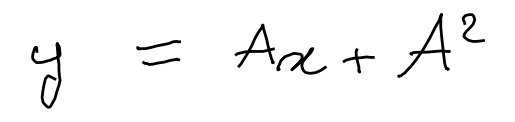

In [29]:
from IPython.display import Image
Image(filename=path + '//001-equation000.inkml.png')

# Testing Individual Transformations

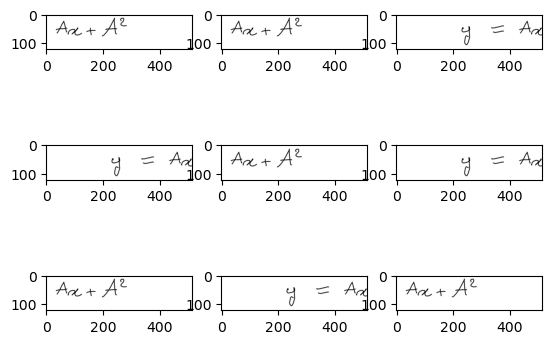

In [3]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


# load the image
img = load_img(path + '//001-equation000.inkml.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

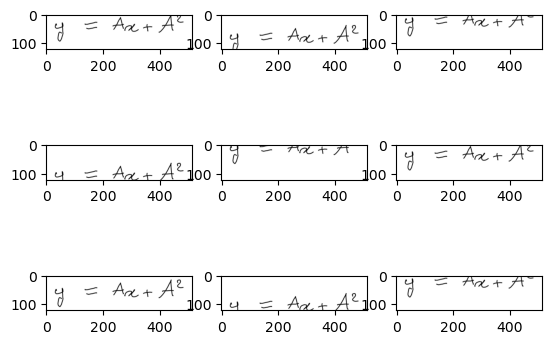

In [4]:

# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

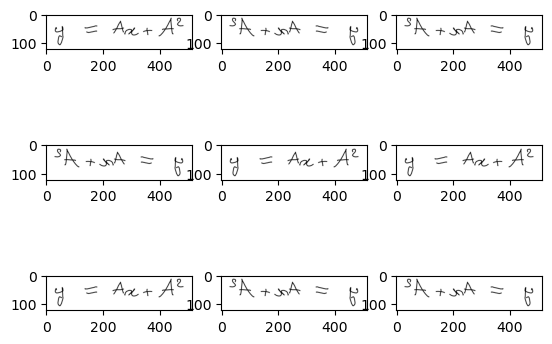

In [5]:
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

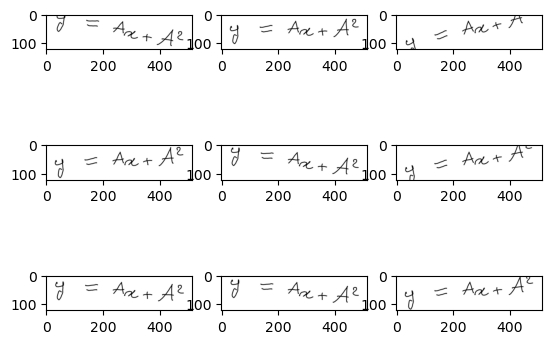

In [9]:
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=15) #CHANGE THIS
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

#HMM THIS IS POSSIBLE

<ipython-input-21-c0894d6dd5d8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(330 + 1 + i)


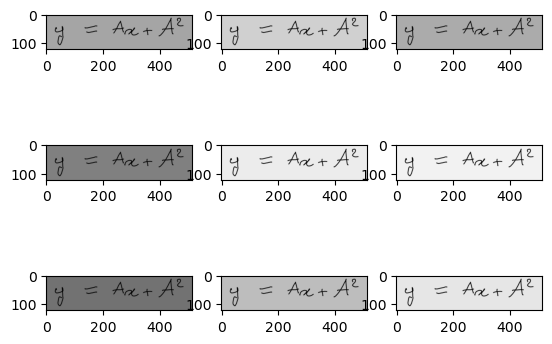

In [21]:
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.4,1.0]) #yea darkness at 0.4 seems reasonable
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

#THIS IS THE MOST RELEASTIC

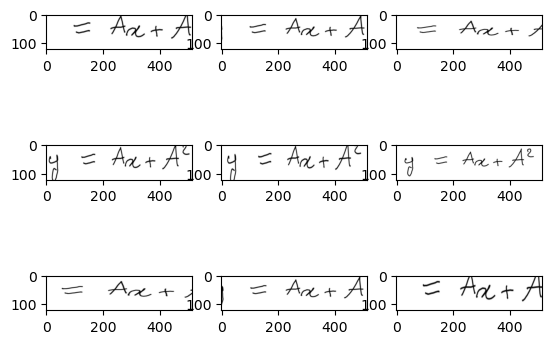

In [22]:
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Combining all Transformations

In [35]:
datagen = ImageDataGenerator(
        #rotation_range=15,
        brightness_range=[0.4,1.0])
        #width_shift_range=0.2,
        #height_shift_range=0.2)
        #fill_mode='nearest')

img = load_img(path + '//001-equation000.inkml.png')

it = datagen.flow(img, batch_size=1)

x = img_to_array(img)
print(x.shape) #(122, 515, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 122, 515, 3)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='001-equation000', save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (122, 515, 3))

In [38]:
# ImageDataGenerator brightness
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

x = img_to_array(img)
print(x.shape) #(122, 515, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 122, 515, 3)

# iterator
aug_iter = datagen.flow(x, batch_size=1)

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

(122, 515, 3)
